In [16]:
import pandas as pd
import os
path="d:\EDA"
os.chdir(path)
#os.listdir(path)

In [17]:
from missingpy import KNNImputer#importing the KNN

In [18]:
knn_demo=pd.read_excel('KNNdemo.xlsx')
knn_demo

,X1,X2,X3,X4
0,1.0,3,NaN,8
1,2.0,4,6.0,8
2,NaN,3,5.0,7
3,3.0,3,3.0,3


In [19]:
imputer = KNNImputer(missing_values="NaN",metric="masked_euclidean",n_neighbors=2)
new_demo=imputer.fit_transform(knn_demo)
new_demo

array([[1. , 3. , 5.5, 8. ],
       [2. , 4. , 6. , 8. ],
       [1.5, 3. , 5. , 7. ],
       [3. , 3. , 3. , 3. ]])

In [20]:
(6+5+3)/3

4.666666666666667

In [21]:
from pydataset import data
df=data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [22]:
df1=df.drop(columns=['Species'])
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [23]:
from sklearn.cluster import KMeans

In [24]:
km=KMeans(n_clusters=3,init='k-means++',random_state=1234)#creating the kmean object, 
#k-means++ represents the iterations according to the centroid position change.
#setting the random_state to get the cluster cordinates according to the order of the rows in the data frame.

In [25]:
km.fit(df1.values) # setting the kmean object to the data frame

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [26]:
km.cluster_centers_#identifing the centroid cordinate in the data frame 

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [27]:
df1['cluster']=km.predict(df1.values)#creating a column called cluster in the data frame

In [28]:
df1.groupby(['cluster']).size()#grouping according to the similarities

cluster
0    50
1    62
2    38
dtype: int64

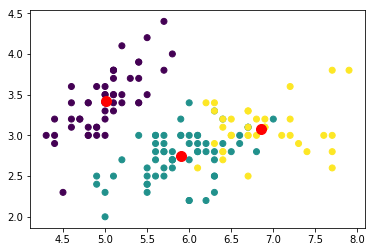

In [29]:
#plot the scatter plot from sepal length and sepal width 
from matplotlib import pyplot as plt
plt.scatter(df1['Sepal.Length'],df1['Sepal.Width'],c=df1['cluster'])#c indicates the color 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',s=100)#'S' indicates the size of centorid

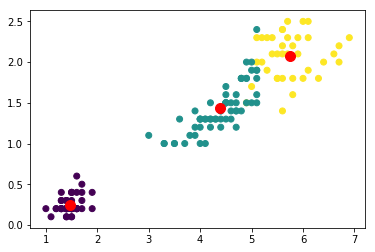

In [30]:
#plot the scatter plot from sepal length and sepal width 
from matplotlib import pyplot as plt
plt.scatter(df1['Petal.Length'],df1['Petal.Width'],c=df1['cluster'])#c indicates the colors according to the different clusters
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],c='red',s=100)#'S' indicates the size of centorid